In [233]:
#autosaves every 5 minutes
%autosave 300

Autosaving every 300 seconds


### __*UNIV*6080 Computational Thinking for Artificial Intelligence - Final Project*__
<span style="font-size:12px;">*Written by: Joseph Lee - MASc. Student at the University of Guelph*</span>

# Introduction to Machine Learning Techniques - Support Vector Machines
---
This tutorial will go over the basics of Support Vector Machines (SVM), how they work and different types of SVMs for certain cases through derivations, coding examples and general explanations. The information presented in this Notebook is a condensed summary of what can be read in Chapter 12 from [Mathematics for Machine Learning](https://mml-book.github.io/book/mml-book.pdf) by Deisenroth et al [[1]](#ref). Everything within this Notebook is capable of running in a blank environment and instances where a cell takes an extended time to run, a note will be presented. Make sure to run all the code cells in the order presented to avoid any errors when going through the tutorial. This tutorial was created using a Virtual Environment running Python 3.8, I cannot not guarantee that other versions of python will run smoothly. For the best possible experience, run this Notebook using Python 3.8. If you would like to read more detailed information on the topics regarding Support Vector Machines, there will be links attached in the [references](#ref) below.

## Table of Contents
---
1. **[What is a Support Vector Machine?](#section1)**

    1.1 **[Separation of Data - Hyperplanes](#subsection11)**
    
    1.2 **[Defining the Margin](#subsection12)**
    
    1.3 **[Hard Margin Support Vector Machine](#subsection13)**
    
    1.4 **[Soft Margin Support Vector Machine](#subsection14)**
 
 
2. **[Dual Support Vector Machines](#section2)**


3. **[Kernels](#section3)**


**[References](#ref)**

---
## **Before starting the tutorial, make sure to run the following cells below.**
---

In [234]:
## Only run this cell if you do not have numpy, pandas, scipy and/or scikit-learn installed
## Running this cell may take a while to finish

import urllib.request
url = 'https://raw.githubusercontent.com/JLee53/SupportVectorMachine/main/requirements.txt'
filename = 'requirements.txt'
urllib.request.urlretrieve(url, filename)

!pip install -r requirements.txt --user

## 1. What is a Support Vector Machine? <a name="section1"></a>
---
A Support Vector Machines or SVMs are supervised learning algorithm that creates a system for binary classification. Whether that system is to detect {true, false}, {pass, fail}, {red, blue} or {0, 1} or is a linear or non-linear model, it provides a geometric visualization for the process of supervised machine learning [[1]](#ref). SVMs are not computationally expensive compared to other learning algorithms and perform well with models of high dimension [[2]](#ref).

### 1.1 Separation of Data - Hyperplanes <a name="subsection11"></a>
---
Hyperplanes play an important role for the classification in SVMs. They are used to divide the example set in two to define a positive and negative side. When provided data in $R^D$ (where D corresponds to the dimension of the given vector space), the hyperplane partitions it in a way where ideally the same labels are located on the same side of the hyperplane. The hyperplane is an affine subspace presented in $R^{D-1}$ [[1]](#ref).

For example, let example $x∈R^D$ be an element of the data space. The function of the hyperplane will be in $f:R^D\rightarrow R$. The general form of the hyperplane is presented as:
<a name="1.1"></a>

\begin{equation}
x \mapsto f(x):=\langle w,x \rangle +b
\label{eq:hyper} \tag{1.1}
\end{equation}

where, $w$ is the normal vector to the hyperplane which means it will always be orthogonal to any vector on the hyperplane ($w∈R^D$) and $b$ is the intercept ($b∈R$).

When training the classifier, to ensure that the data points with positive labels are on the positive side of the hyperplane, we include a condition:
<a name="1.2"></a>

\begin{equation}
\langle w,x_n \rangle + b \geq 0 \;\;\; \text{when} \;\;\; y_n = +1
\label{eq:pos} \tag{1.2}
\end{equation}

and the data points with negative labels are on the negative side, with a similar condition:
<a name="1.3"></a>

\begin{equation}
\langle w,x_n \rangle + b < 0 \;\;\; \text{when} \;\;\; y_n = -1
\label{eq:neg} \tag{1.3}
\end{equation}

combining the two condition into a single equation then becomes:
<a name="1.4"></a>

\begin{equation}
y_n(\langle w,x_n \rangle + b) \geq 0 \text{.}
\label{eq:posneg} \tag{1.4}
\end{equation}



### 1.2 Defining the Margin <a name="subsection12"></a>
---
The concept of the margin is very simple to understand. The margin of the SVM is the distance that separates the hyperplane from the closest examples or data points within the dataset, assuming that the dataset is linearly separable [[1]](#ref). To compute this distance, we need to define a scale to where the distance will be measured. Using equation ([1.1](#1.1)) for the hyperplane and considering a data point $x_a$ to be on the positive side of the hyperplane, i.e., condition ([1.2](#1.2)). We will also denote $x_a'$ as the orthographic projection of $x_a$ onto the hyperplane. This will allow us to compute $r > 0$ of $x_a$ from the hyperplane, where $r$ is the scaling factor for the absolute distance between $x_a$ and $x_a'$. If $w$ is known, we can also choose a vector of unit length, meaning its norm will be 1 and obtain the scaling factor by dividing $w$ be its norm. Using vector addition, we will then obtain:
<a name="1.5"></a>

\begin{equation}
x_a=x_a'+r \frac{w}{||w||}
\label{eq:margin1} \tag{1.5}
\end{equation}

We just went over how to compute the distance that $x_a$ is from the hyperplane, which is $r$, but what if we choose $x_a$ to be located at the closest point to the hyperplane. As explained at the beginning of section [1.2](#subsection12), this means that the distance $r$ is also now the distance of the margin as well. If considering this case of $r$ being the margin, then we would want to make all positive data points further than $r$ distance from the hyperplane in the positive direction and all negative data points to be further than $r$ distance from the hyperplane in the negative direction. When including the margin to the hyperplane with the following conditions, the new objective will now be:
<a name="1.6"></a>

\begin{equation}
y_n(\langle w,x_n \rangle + b) \geq r \text{.}
\label{eq:rcond} \tag{1.6}
\end{equation}

This condition is similar to the one derived in equation ([1.4](#1.4)) but instead of using a distance 0 from the hyperplane, the margin distance $r$ is used. Since we are only interested in the direction, we need to add an assumption to the model that the parameter vector is of unit length, i.e. $||w|| = 1$, where we use the Euclidean norm $||w|| = \sqrt{w^Tw}$. This allows for an easier understanding that of the margin distance $r$ as it is just a scaling factor of a vector of length 1.

When combining all the requirements that we just went over into a single optimization problem, we obtain the following objective:
<a name="1.7"></a>

\begin{equation}
\begin{matrix}
\begin{matrix}
max \\ w,b,r \end{matrix} \;\;\;\;\; r \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;  \\
\\
subject \; to \; y_n(\langle w,x_n \rangle +b) \geq r, \;\;\; ||w||=1, \;\;\; r>0 \text .
\end{matrix}
\label{eq:obj1} \tag{1.7}
\end{equation}

What ([1.7](#1.7)) means is that we want to maximize $r$, while making sure that the data is located on the correct side of the hyperplane. When the value of $r$ for the margin is large, the complexity of the function is lower [[1]](#ref). In other words, the smaller the margin is, the greater the chance that the model will incorrectly classify the data [[3]](#ref). To think of it visually, since the margin is smaller, the distance between the positive and negative sides will be closer, meaning a greater chance an outliers may sneak into the wrong side of the hyperplane due to variance or noise.

### 1.3 Hard Margin Support Vector Machine <a name="subsection13"></a>
---
For the derivation of the Hard Margin SVM, we will bee making a different assumption that was made previously in section ([1.2](#subsection12)). Instead we will define the scale of the data at the closest example point to be equal to 1 or $\langle w,x\rangle +b =1$. What this means is the the closest data point $x_a$ is now located on the margin. I won't go through the entire derivation as it is explained in detail in the textbook. In short, $x_a'$ being the orthogonal projection of $x_a$ on the hyperplane, we can get:
<a name="1.8"></a>

\begin{equation}
\langle w,x_a' \rangle +b=0 \text{.}
\label{eq:hard0} \tag{1.8}
\end{equation}

By substituting equation ([1.5](#1.5)) into equation ([1.8](#1.8)), exploiting the bilinearity of inner products and setting one side of the equation to 1 because of the assumption. The formulation can be simplified into:
<a name="1.9"></a>

\begin{equation}
r=\frac{1}{||w||}
\label{eq:simpr} \tag{1.9}
\end{equation}

which is denoted as the distance to the hyperplane. Due to the assumption that the closest point is 1 which is also the margin. The new condition becomes: 
<a name="1.10"></a>

\begin{equation}
y_n(\langle w,x_n \rangle + b) \geq 1
\label{eq:hardcond} \tag{1.10}
\end{equation}

which ensures that any data point whether positive or negative is at least 1 away from the hyperplane in its respective side. The new objective for maximization will now be: 
<a name="1.11"></a>

\begin{equation}
\begin{matrix}
\begin{matrix}
max \\ w,b \end{matrix} \;\;\;\;\; \frac{1}{||w||}
\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;  \\
\\
subject \; to \; y_n(\langle w,x_n \rangle +b) \geq 1, \;\;\; for \; all \;\;\; n = 1,\ldots ,N \text .
\end{matrix}
\label{eq:hardobmax} \tag{1.11}
\end{equation}

Changing the maximization term for minimization, we obtain:
<a name="1.12"></a>

\begin{equation}
\begin{matrix}
\begin{matrix}
min \\ w,b \end{matrix} \;\;\;\;\; \frac{1}{2}||w||^2
\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;  \\
\\
subject \; to \; y_n(\langle w,x_n \rangle +b) \geq 1, \;\;\; for \; all \;\;\; n = 1,\ldots ,N 
\end{matrix}
\label{eq:hardobmin} \tag{1.12}
\end{equation}

where the $1/2$ is added to obtain a cleaner result for when computing the gradient. The min term is known as the hard margin SVM. The main reason for the "hard" in the name is due to the formulation not allowing for any violation of the margin condition [[1]](#ref). 

In the following section, we will go over how this hard condition can be relaxed to allow for violations if the dataset provided is not linearly separable. But before that, let's go over an example of how to create a hard margin SVM in python.

#### Example 1 - Creating a Hard Margin SVM <a name="example1"></a>
---

##### **If the plot created is not linearly separably, rerun the cell below**

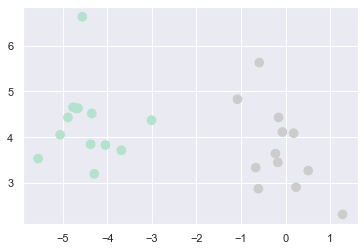

In [235]:
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import datasets

N = 25 # Setting the number of data points
X, Y = datasets.make_blobs(n_samples=N, centers=2 , center_box=(-5,5), n_features=2, cluster_std=0.8) # Creating a random sample data


sb.set(style="darkgrid") # Change plot theme
plt.scatter(X[:,0], X[:,1], c=Y, s=75, cmap='Pastel2') # Plot a scatter plot


In [236]:
import numpy as np
from sklearn.svm import SVC # This imports the Support Vector Classifier

hardsvm = SVC(kernel='linear', C=1000, max_iter=200000)
hardsvm.fit(X, Y)

SVC(C=1000, kernel='linear', max_iter=200000)

In [237]:
def plot_hard_SVM(model):

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1])
    y = np.linspace(ylim[0], ylim[1])
    yy, xx = np.meshgrid(y, x)
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    P = model.decision_function(xy).reshape(xx.shape)
    
    # plot decision boundary and margins
    ax.contour(xx, yy, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

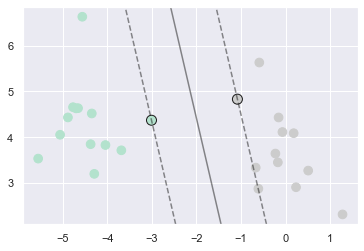

In [238]:
plt.scatter(X[:,0], X[:,1], c=Y, s=75, cmap='Pastel2') # Plot a scatter plot
plot_hard_SVM(hardsvm) # Call the function

As you can see in the figure above, the resulting margin lines are located at the closest point to the hyperplane. This means that no point is located inside the margin.

### 1.4 Soft Margin Support Vector Machine <a name="subsection14"></a>
---
Next, we will go over the objective for the Soft Margin SVM. The objective presented in equation ([1.12](#1.12)) is very similar to the objective for the Soft Margin SVM. Different from the Hard Margin SVM, the Soft Margin SVM allows for examples to be within the margin or on the wrong side of the hyperplane. This is done by introducing a slack variable $\xi_n$ corresponding to each example-label pair $(x_n,y_n)$ [[1]](#ref). The following is the objective for the Soft Margin SVM:
<a name="1.13"></a>

\begin{equation}
\begin{matrix}
\begin{matrix}
min \\ w,b, \xi \end{matrix} \;\;\;\;\; \frac{1}{2}||w||^2 + C\sum^N_{n=1}\xi_n
\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;  \\
\\
subject \; to \; y_n(\langle w,x_n \rangle +b) \geq 1 - \xi_n, \;\;\;  \xi_n \geq 0, \;\;\; for \; all \;\;\; n = 1,\ldots ,N 
\end{matrix}
\label{eq:softobmin} \tag{1.13}
\end{equation}

where $||w||^2$ is known as the regularizer. If C is large, this mean the weight of the slack variable $\xi$ increases, this leads to a higher priority to data points that are not on the correct side of the margin [[1]](#ref).

Now let's derive this using a different technique. We will be using a loss function that is capable of looking at binary labels to count the number of mismatches between the prediction and the label [[1]](#ref). This means by comparing the output $f(x_n)$ with the label $y_n$. If they match, the loss is zero. No match, then the loss is one. This can be done using the zero-one loss, though this loss function results in optimization problems for the $w$ and $b$ parameters, therefore, we will use something called the Hinge Loss, i.e., $\ell(t)-max\{0,1-t\} \;\;\; where \;\;\; t=yf(x)=y(\langle w,x\rangle+b)$ [[1]](#ref). An alternative way of presenting this is:
<a name="1.14"></a>

\begin{equation}
\ell(t)=\begin{cases} 0 \;\;\;\;\;\;\;\; if \;\;\; t \geq 1\\    
1-t \;\;\; if \;\;\;t < 1   
\end{cases} \text .
\label{eq:hinge1} \tag{1.14}
\end{equation}

To summarize equation ([1.14](#1.14)) in a few sentences. If $f(x)$ is on the right side of the hyperplane and further than distance 1, the loss is 0. If $f(x)$ is on the right side of the hyperplane but within the margin, then the loss returns a positive value. If $f(x)$ is on the wrong side ($t<0)$, then the hinge loss is an even larger number, which increases linearly [[1]](#ref). For comparison, the loss function for the Hard Margin SVM would be:
<a name="1.15"></a>

\begin{equation}
\ell(t)=\begin{cases} 0 \;\;\;\; if \;\;\; t \geq 1\\    
\infty \;\;\; if \;\;\;t < 1   
\end{cases}
\label{eq:losshard} \tag{1.15}
\end{equation}

which ensures that anything less than a distance of 1 from the hyperplane has a loss of $\infty$, as per the condition where nothing should be inside the margin [[1]](#ref). By using the Hinge Loss, we get an unconstrained optimization problem:
<a name="1.16"></a>

\begin{equation}
\begin{matrix}
min \\ w,b \end{matrix} \;\;\;\;\; \begin{matrix} \frac{1}{2}||w||^2 \\ regularizer \end{matrix} +  \begin{matrix} C\sum^N_{n=1}\;max{0,1-y_n(\langle w,x_n\rangle + b)} \\ error term \end{matrix} \text .
\label{eq:softobj} \tag{1.16}
\end{equation}

By substituting the two constraints for the slack variable $\xi$ from the loss function into ([1.16](#1.16)) and rearranging, we will end up with the exact same Soft Margin SVM presented in ([1.13](#1.13)) [[1]](#ref).

#### Example 2 - Creating a Soft Margin SVM <a name="example2"></a>
---

In [250]:
from sklearn.svm import LinearSVC

softsvm = LinearSVC(loss='squared_hinge', C=0.8, max_iter=2000000)
softsvm.fit(X, Y)

LinearSVC(C=0.8, max_iter=2000000)

In [251]:
def plot_linear_SVM(model):
    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1])
    y = np.linspace(ylim[0], ylim[1])
    yy, xx = np.meshgrid(y, x)
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    P = model.decision_function(xy).reshape(xx.shape)
    
    # plot decision boundary and margins
    ax.contour(xx, yy, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

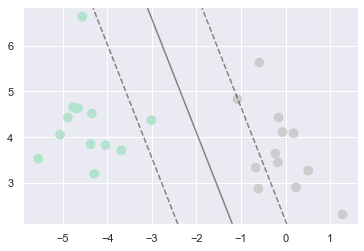

In [252]:
plt.scatter(X[:,0], X[:,1], c=Y, s=75, cmap='Pastel2') # Plot a scatter plot
plot_linear_SVM(softsvm) # Call the function

When comparing the output of the Soft Margin SVM to the Hard Margin SVM, it can be observed that there are data points inside the margin.

## 2. Dual Support Vector Machines <a name="section2"></a>
---
The previously explained SVMs are what is known as a primal SVM as $w$ was the same dimension as $x$. This was defined back in section ([1.1](#subsection1)). This means that the number of parameters (the dimension of $w$) of the optimization problem grows linearly with the number of features [[1]](#ref). The Dual SVM optimization problem instead increases the number of parameters with the number of examples in the training set [[1]](#ref). The Duel SVM is useful for problems where the numbers of features is more than the number of examples in the training dataset. Another benefit of the Dual SVM is that it allows for kernels to be easily applied, which we will go over later in section ([3](#section3)).

### 2.1 Deriving a Dual SVM using Lagrange Multipliers <a name="subsection21"></a>
---
Similar to the how we derived the Hard and Soft Margin SVMs, we will also show two ways of deriving the Dual SVM. In this section we will be going over the use of the Lagrange Multiplier to obtain the Dual SVM. 

To start off, we will use $\alpha$ as the Lagrange Multiplier which corresponds to the constraint defines in equation ([1.13](#1.13)), where the examples are classified according to the conditions and $\gamma \geq 0$ as the Lagrange Multiplier corresponding to the non-negativity constraint of the slack variable in the same equation. The Lagrangian is then given by:
<a name="1.17"></a>

\begin{equation}
\mathcal{L} (w,b,\xi,\alpha,\gamma) = \frac{1}{2}||w||^2 + C\sum^N_{n=1}\xi_n - \sum^N_{n=1}\alpha_n(y_n(\langle w,x_n \rangle +b) - 1 + \xi_n) - \sum^N_{n=1}\gamma_n \xi_n \text.
\label{eq:lagr} \tag{1.17}
\end{equation}

Then by differentiating the Lagrangian in ([1.17](#1.17)) with respect to the three primal variables, $w$, $b$ and $\xi$ and setting all the partial derivatives to zero, we obtain a simplified equation for each primal variable. For example, $w$ can be simplified to become,
<a name="1.18"></a>

\begin{equation}
w=\sum^N_{n=1}\alpha_n\gamma_n x_n \text.
\label{eq:wlag} \tag{1.18}
\end{equation}

Equation ([1.18](#1.18)) is a theorem which is in a collection of theorems called the representer theorem and states that the optimal weight in the primal is a linear combination of the example set $x_n$ [[1]](#ref). To see the remaining two terms, they can be observed on page 390 of the [Mathematics for Machine Learning](https://mml-book.github.io/book/mml-book.pdf) digital textbook, which this tutorial is based upon. Combining the newly derived terms into the Lagrangian ([1.17](#1.17)), we will then obtain the new objective:
<a name="1.19"></a>

\begin{equation}
\begin{matrix}
\begin{matrix}
min \\ \alpha \end{matrix} \;\;\;\;\; \frac{1}{2}\sum^N_{i=1}\sum^N_{j=1}y_iy_j\alpha_i\alpha_j\langle x_i,x_j\rangle-\sum^N_{i=1}\alpha_i
\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;  \\
\\
subject \; to \; \sum^N_{i=1}y_i\alpha_i = 0, \;\;\;  0 \leq \alpha_i \leq C, \;\;\; for \; all \;\;\; i = 1,\ldots ,N \text .
\end{matrix}
\label{eq:lagobj} \tag{1.19}
\end{equation}

The set of inequality constraints in the SVM are called "box constraints" because they limit the vector $\alpha=[\alpha_i, \ldots,\alpha_N]^T  ∈ R^N$ of Lagrange Multipliers to be inside a box defined by 0 to C on each axis [[1]](#ref). Once we obtain the dual parameters $\alpha$ from ([1.19](#1.19)), we can get the primal parameters $w$ by using the representer theorem, shown in equation ([1.18](#1.18)), this will be denotes as $w^*$ for the optimal primal parameter. Then we can obtain the primal intercept $b^*$ by using equation for when a data point is located on the margin line, i.e., $\langle w^*,x_n \rangle +b = y_n$. Rearranging to solve for b, we get:
<a name="1.20"></a>

\begin{equation}
b^*=y_n-\langle w^*,x_n\rangle \text .
\label{eq:inte} \tag{1.20}
\end{equation}

There may be a case where there are no data points located directly on the margin. We would then compute $|y_n-\langle w^*,x_n \rangle|$ for all support vectors and take the median value o this absolute value difference to be the value of $b^*$.

### 2.2 Geometric Derivation of the Dual SVM <a name="subsection22"></a>
---
Before we show you an example of what a Dual SVM would look and how to code it in python, we will be using a different approach for obtaining the Dual SVM which is to consider an alternative geometric argument. Considering a the same set of examples $x_n$, with the same labels, we would like to create a convex hull that consists of all the examples so that it is the smallest possible set [[1]](#ref). 

To start off, lets build an understanding about convex combination of points. Let's consider two points, $x_1$ and $x_2$ with each point having a non-negative weight $\alpha_1,\alpha_2 \geq 0$, such that $\alpha_1 + \alpha_2 = 1$. If we wanted to describe the relation between the two points, it would be $\alpha_1x_1+\alpha_2x_2$, which is a line. If we add a third point $x_3$ with weight $\alpha_3$ such that the sum of the weight is equal to 1, the resulting shape of the three points would create triangle. This space is called a convex hull, which is formed by the edges corresponding to each pair of points. By adding more and more points, the number of points will become greater than the number of dimensions and some point will be located inside the convex hull. In general, to describe this with mathematical terms, it would be:
<a name="1.21"></a>

\begin{equation}
conv(X) = {\sum^N_{n=1}\alpha_nx_n} \;\;\; with \;\;\; \sum^N_{n=1}\alpha_n = 1 \;\;\; and \;\;\; \alpha_n \geq 0, \;\;\; for \; all \; n=1,\ldots ,N \text .
\label{eq:hull} \tag{1.21}
\end{equation}

If we pick two points, one for the positive and one for the negative hull. These two points need to be the closest to the other respective hull. The distance between the two points is called the difference vector, represented as 
<a name="1.22"></a>

\begin{equation}
w:= c-d \text,
\label{eq:nepo} \tag{1.22}
\end{equation}

where $c$ is the convex hull of positive sets and $d$ is the negative. The respective equations can be written as,
<a name="1.23"></a>

\begin{equation}
c = {\sum_{n:y_n=+1}\alpha^+_nx_n}
\label{eq:poshull} \tag{1.23}
\end{equation}

\begin{equation}
and 
\end{equation}

<a name="1.24"></a>

\begin{equation}
d = {\sum_{n:y_n=-1}\alpha^-_nx_n}
\label{eq:neghull} \tag{1.24}
\end{equation}

which is from ([1.21](#1.21)). Combining ([1.22](#1.22)), ([1.23](#1.23)) and ([1.24](#1.24)) and substituting into the optimization problem, $\begin{matrix}min \\ w \end{matrix} \frac{1}{2}||w||^2$. We will eventually end up with the constraint
<a name="1.25"></a>

\begin{equation}
\sum^N_{n=1}y_n\alpha_n = 0 \text ,
\label{eq:hullobj} \tag{1.25}
\end{equation}

once we let $\alpha$ be the set of all coefficients, i.e., $\alpha^+, \alpha^- = 1$. To obtain a Soft Margin Hull, we would consider a reduced hull. The reduced hull is smaller than the convex hull but has an upper bond to the size of the coefficient $\alpha$ [[1]](#ref).

#### Example 3 - Creating a Dual SVM <a name="example3"></a>
---

In [242]:
dualsvm = LinearSVC(dual=True, C=0.8, max_iter=200000)
dualsvm.fit(X, Y)

LinearSVC(C=0.8, max_iter=200000)

Soft Dual SVM


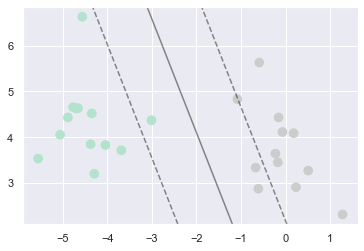

Soft Margin SVM


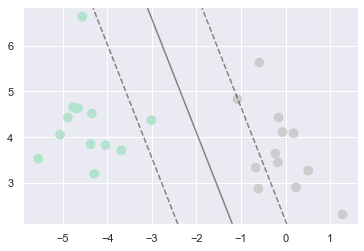

In [253]:
print('Soft Dual SVM')
plt.scatter(X[:,0], X[:,1], c=Y, s=75, cmap='Pastel2') # Plot a scatter plot
plot_linear_SVM(dualsvm) # Call the function
plt.show()
print('Soft Margin SVM')
plt.scatter(X[:,0], X[:,1], c=Y, s=75, cmap='Pastel2') # Plot a scatter plot
plot_linear_SVM(softsvm) # Call the function

As you can see from the figures above, the resulting plots are identical. The only difference between the two was that for the Dual SVM, the dual was set to true in the `LinearSVC(dual=True, C=1000, max_iter=200000)` function. By default, the dual is set the true, but to show the difference, the parameter was defined when calling the function.

## 3. Kernels <a name="section3"></a>
---

Considering the Dual SVM shown in ([1.19](#1.19)), the inner product is only between the data points $x_i$ and $x_j$ and no inner product between the data points and parameters. Considering a set of features $\phi(x)$ to represent $x$, the only change to the dual SVM will be to replace the inner product with $\phi(x)$. The benefit of this is that $\phi(x)$ can be a nonlinear function, this will allow us to construct a classifier for a nonlinear set of data, $x_n$, even if the SVM assumes a linear classifier. By defining a similarity function $k(x_i,x_j)$ between $x_i$ and $x_j$, it introduces the case where for a certain class of similarity functions, called kernels, the similarity function has the ability to define a nonlinear feature map $\phi(\bullet)$. The kernel can be represented as,
<a name="1.26"></a>

\begin{equation}
k(x_i,x_j)=\langle \phi(x_i),\phi (x_j)\rangle_x \text.
\label{eq:kernel} \tag{1.26}
\end{equation}

There is a unique kernel Hilbert space associated with every kernel $k$. In this unique association, $\phi(x)=k(\bullet,x)$ is called the canonical feature map. The generalization from an inner product to a kernel function is known as the kernel trick, as it hides away the explicit non-linear feature maps. The kernel matrix $K$ must be symmetric and positive semidefinite and is resulting from the inner product of $k(\bullet,\bullet)$ to a dataset. This can also be referred to as the Gram matrix.

Some popular kernels for multivariate real-valued data $x_i ∈ R^D$ are the Polynomial kernel, the Gaussian Radial Basis Function kernel, and the Rational Quadratic kernel. Each kernel has their benefits for different types of data, we will be going over some of them to show example of when to use them. Usually, to decide on the kernel and parameters of the kernel used, when a visual representation is not found, is to use a technique like nested cross-validation to identify the best model.

In general, the kernel function is used to compute more efficiently than the inner product between explicit feature maps.

#### Example 4 - Using Different Kernels for SVM <a name="example4"></a>
---

First we will need to create a dataset. To do this we will be using the library `sklearn` to import a data generator function, similar to what we did for [example 1](#example1).

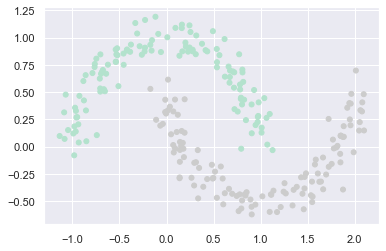

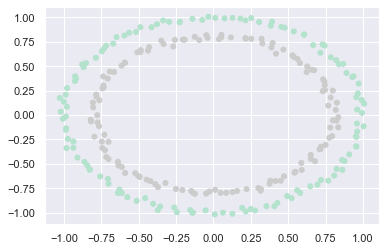

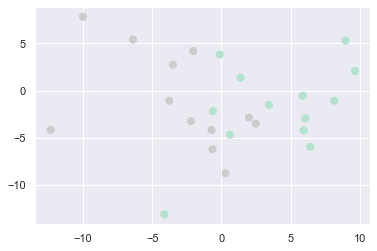

In [244]:
from sklearn.datasets import make_moons, make_circles

xMoon, yMoon = make_moons(n_samples=N*10, noise=0.1)
xCir, yCir = make_circles(n_samples=N*10, noise=0.02)
xBlob, yBlob = datasets.make_blobs(n_samples=N, centers=2 , center_box=(-5,5), n_features=2, cluster_std=4) # Creating a random sample data


sb.set(style="darkgrid") # Change plot theme
plt.scatter(xMoon[:,0], xMoon[:,1], c=yMoon, s=25, cmap='Pastel2') # Plot a scatter plot
plt.show()
plt.scatter(xCir[:,0], xCir[:,1], c=yCir, s=25, cmap='Pastel2') # Plot a scatter plot
plt.show()
plt.scatter(xBlob[:,0], xBlob[:,1], c=yBlob, s=50, cmap='Pastel2') # Plot a scatter plot

In [245]:
moon = SVC(kernel='rbf',C=100000)
moon.fit(xMoon, yMoon)

cir = SVC(kernel='rbf',C=100000)
cir.fit(xCir, yCir)

blob = SVC(kernel='rbf',C=100000)
blob.fit(xBlob, yBlob)

SVC(C=100000)

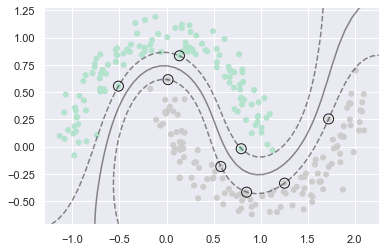

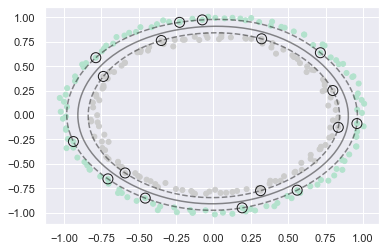

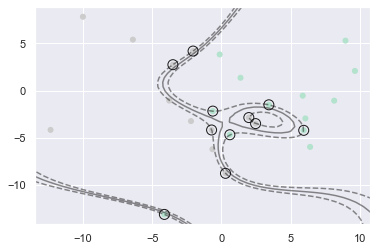

In [246]:
plt.scatter(xMoon[:,0], xMoon[:,1], c=yMoon, s=25, cmap='Pastel2') # Plot a scatter plot
plot_hard_SVM(moon)
plt.show()

plt.scatter(xCir[:,0], xCir[:,1], c=yCir, s=25, cmap='Pastel2') # Plot a scatter plot
plot_hard_SVM(cir)
plt.show()

plt.scatter(xBlob[:,0], xBlob[:,1], c=yBlob, s=25, cmap='Pastel2') # Plot a scatter plot
plot_hard_SVM(blob)

As you can see above, all the data examples were solved using a Gaussian kernel. In most cases for nonlinear data, the Gaussian will be able to correctly separate the dataset. Though, to make sure the best kernel is selected, a method such as nested cross-validation should be used.

## References <a name="ref"></a>
[[1]](https://mml-book.github.io/book/mml-book.pdf) M. P. Deisenroth, A. A. Faisal, and C. S. Ong, Mathematics for Machine Learning. Cambridge University Press, 2020. <br/>
[[2]](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47) Rohith Gandhi, “Support Vector Machine — Introduction to Machine Learning Algorithms | by Rohith Gandhi | Towards Data Science,” towards data science, 2018. [Online]. Available: https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47. [Accessed: 21-Nov-2020]. <br/>
[[3]](https://medium.com/@sathvikchiramana/svm-dual-formulation-7535caa84f17) S. Chiramana, “SVM DUAL FORMULATION. Support Vector Machine (SVM) is a… | by sathvik chiramana | Medium,” Medium, 2019. [Online]. Available: https://medium.com/@sathvikchiramana/svm-dual-formulation-7535caa84f17. [Accessed: 22-Nov-2020].